In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import tensorflow as tf

In [2]:
data=pd.read_csv("dataset\diabetes\diabetes.csv")
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [3]:
set(data.gender)

{'Female', 'Male', 'Other'}

In [4]:
data.drop(data[(data.gender=='Other')].index,inplace=True)

In [5]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
l=[list(set(data.gender)),list(set(data.smoking_history))]
l

[['Male', 'Female'],
 ['never', 'No Info', 'not current', 'current', 'former', 'ever']]

In [7]:
def gender(x):
    return l[0].index(x)
def smoking(x):
    return l[1].index(x)

In [8]:
data.hypertension.describe()

count    99982.000000
mean         0.074863
std          0.263172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hypertension, dtype: float64

In [9]:
data.smoking_history=data.smoking_history.apply(lambda x: smoking(x))
data.gender=data.gender.apply(lambda x: gender(x))

C:\Users\Armaan\AppData\Local\Temp\ipykernel_15032\582978698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)


<Axes: xlabel='bmi', ylabel='Density'>

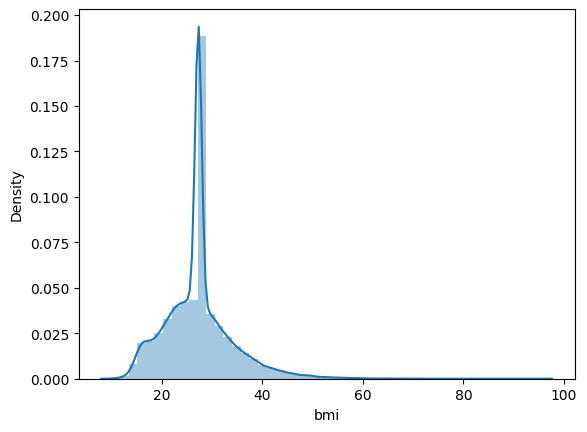

In [152]:
sns.distplot(data.bmi)

In [100]:
data.blood_glucose_level.skew()

0.8216549517517585

In [109]:
data[data.gender==1].describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,18.0,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.0
mean,1.0,29.555556,0.0,0.0,2.722222,27.379444,5.405556,139.444444,0.0
std,0.0,16.695270,0.0,0.0,1.708303,6.420016,1.135767,33.380555,0.0
min,1.0,7.000000,0.0,0.0,1.000000,14.090000,3.500000,80.000000,0.0
25%,1.0,18.250000,0.0,0.0,1.000000,25.002500,4.625000,126.000000,0.0
50%,1.0,25.000000,0.0,0.0,3.000000,27.320000,6.050000,158.000000,0.0
75%,1.0,46.500000,0.0,0.0,4.000000,30.977500,6.175000,159.750000,0.0
max,1.0,55.000000,0.0,0.0,5.000000,37.490000,6.600000,200.000000,0.0


In [10]:
x=data.drop(["diabetes"],axis=1)
y=data["diabetes"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[8],dtype=tf.float32),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(48,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0008),loss=tf.losses.binary_crossentropy,metrics=["accuracy"])

In [13]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
2344/2344 [==============================] - 4s 1ms/step - loss: 0.2468 - accuracy: 0.9243
Epoch 2/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1831 - accuracy: 0.9374
Epoch 3/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1495 - accuracy: 0.9468
Epoch 4/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1354 - accuracy: 0.9518
Epoch 5/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1267 - accuracy: 0.9541
Epoch 6/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1235 - accuracy: 0.9564
Epoch 7/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1185 - accuracy: 0.9572
Epoch 8/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1169 - accuracy: 0.9580
Epoch 9/25
2344/2344 [==============================] - 3s 1ms/step - loss: 0.1148 - accuracy: 0.9589
Epoch 10/25
2344/2344 [==============================] - 2s 1ms/step - loss: 0.113

In [14]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 965us/step - loss: 0.1123 - accuracy: 0.9601


[0.11232893913984299, 0.9600735902786255]

In [ ]:
model.save("diabetesModel.h5")

In [15]:
model2=tf.keras.models.load_model("diabetesModel.h5")

In [16]:
model2.evaluate(x_test,y_test)

782/782 [==============================] - 1s 919us/step - loss: 0.1084 - accuracy: 0.9675


[0.10837403684854507, 0.9674748182296753]

In [250]:
y_pred=model2.predict(x_test)

782/782 [==============================] - 1s 747us/step


In [251]:
ypred=y_pred.round()

In [253]:
print(confusion_matrix(y_test,ypred))

[[22779    75]
 [  724  1418]]
